# Fake News Classification NLP

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake["subject"].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [7]:
true["subject"].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


## Creating a category for wheter fake or not

In [8]:
fake["category"] = 1
true["category"] = 0

In [9]:
fake.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [10]:
true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [11]:
df = pd.concat([fake,true]).reset_index(drop = True)

In [12]:
df.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
df.tail()

,title,text,subject,date,category
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-16-710cc489fb10>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


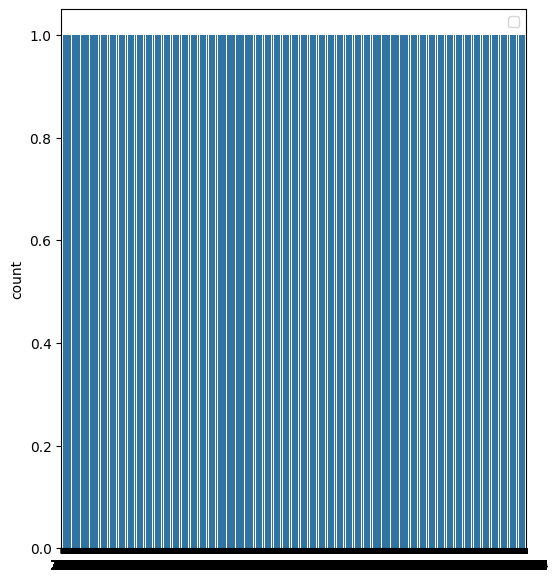

In [16]:
plt.figure(figsize=(6,7))
sns.countplot(df["category"])
plt.legend()
plt.show()

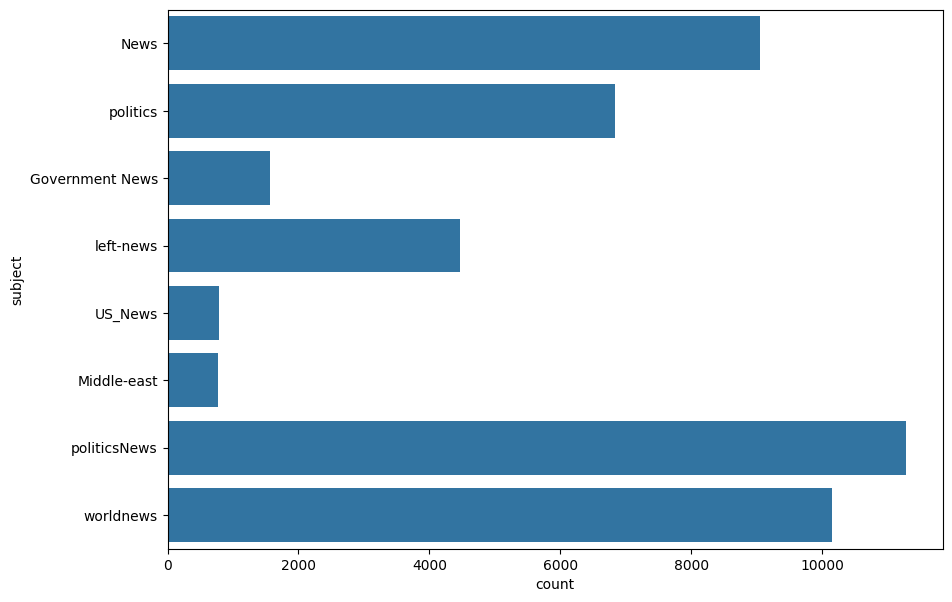

In [17]:
plt.figure(figsize =(10,7))
sns.countplot(df["subject"])
plt.show()

In [18]:
df = df[["text","category"]]

In [112]:
df.head()

,text,category
0,donald trump wish american happy new year leav...,1
1,house intelligence committee chairman devin nu...,1
2,friday revealed milwaukee sheriff david clarke...,1
3,christmas day donald trump announced work foll...,1
4,pope francis annual christmas day message rebu...,1


In [111]:
df.tail()

,text,category
44893,brussels reuters nato ally tuesday welcomed pr...,0
44894,london reuters lexisnexis provider legal regul...,0
44895,minsk reuters shadow disused soviet era factor...,0
44896,moscow reuters vatican secretary state cardina...,0
44897,jakarta reuters indonesia buy 11 sukhoi fighte...,0


## Data Cleaning

In [23]:
# checking if there is any null data
df.isna().sum()*100/len(df)

,0
text,0.0
category,0.0


In [26]:
# checking is there is empty string in the TEXT column
blanks = []

# index, label and review of the text
for index,text in df["text"].items():
	if text.isspace():
		blanks.append(index)

len(blanks)

631

In [27]:
blanks

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [29]:
df["text"][10923]

' '

In [30]:
df.shape

(44898, 2)

In [31]:
df.drop(blanks, inplace=True)

In [32]:
df.shape

(44267, 2)

In [33]:
! pip install nltk spacy

In [59]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
nlp = spacy.load("en_core_web_sm")

In [60]:
lemma = WordNetLemmatizer()

In [61]:
import nltk
nltk.download('stopwords')
# stopwords of spacy
list1 = nlp.Defaults.stop_words
print(len(list1))

# stopwords of NLTK
list2 = stopwords.words('english')
print(len(list2))

# combinig the stopword list
stopwords = list1.union(list2)
print(len(stopwords))

326
198
401


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
# function for cleaning the text

def clean_text(text):
  string = ""
  text = text.lower()
  # simplifying text
  text = re.sub(r"i'm","i am",text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"she's", "she is", text)
  text = re.sub(r"that's", "that is", text)
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"where's", "where is", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"won't", "will not",text)
  text = re.sub(r"can't", "cannot", text)

  # removing any speical characters
  text = re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ", text)
  text = re.sub(r"\s+", " ", text)
  text = re.sub('[^A-Za-z0-9]+', ' ', text)

  for word in text.split():
    if word not in stopwords:
      string += lemma.lemmatize(word) + " "

  return string

In [69]:
df["text"][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [71]:
import nltk
nltk.download('wordnet')
clean_text(df["text"][10])

[nltk_data] Downloading package wordnet to /root/nltk_data...


'centerpiece donald trump campaign presidency white supremacist way public feud get involve people color favorite target course player national football league dare exercise amendment right kneeling national anthem protest racist police brutality person figured racism bad business orange overlord elected founder pizza chain papa john man right history number issue plus pizza suck decided complain player protesting sale dropped turn racism pay know corporation line papa john schnatter longer ceo hack pizza chain breaking papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december 21 2017the thing people certainly allowed political opinion realize opinion come dire consequence especially business trying garner sale support people presume goal ceo know pressure shareholder public outcry boycott nfl stepping right know gone future ceo run company inclusive diverse fabric america guiding symbol nation statue liberty bigot like

In [72]:
# cleaning the whole dataset
df["text"] = df['text'].apply(clean_text)

In [73]:
df["text"]

,text
0,donald trump wish american happy new year leav...
1,house intelligence committee chairman devin nu...
2,friday revealed milwaukee sheriff david clarke...
3,christmas day donald trump announced work foll...
4,pope francis annual christmas day message rebu...
...,...
44893,brussels reuters nato ally tuesday welcomed pr...
44894,london reuters lexisnexis provider legal regul...
44895,minsk reuters shadow disused soviet era factor...
44896,moscow reuters vatican secretary state cardina...


## Model Building

In [100]:
from sklearn.model_selection import train_test_split

x = df["text"]
y = df["category"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [101]:
# TFIDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfdif = vectorizer.fit_transform(x_train)


In [102]:
X_train_tfdif

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5279881 stored elements and shape (35413, 103008)>

In [103]:
from sklearn.svm import LinearSVC
classification = LinearSVC()
classification.fit(X_train_tfdif, y_train)

LinearSVC()

In [107]:
from sklearn.pipeline import Pipeline
text_classification = Pipeline([('tfidf',TfidfVectorizer()),('classification',LinearSVC())])
text_classification.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classification', LinearSVC())])

In [108]:
predictions = text_classification.predict(x_test)

In [110]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[4245   24]
 [  27 4558]]
0.9942398915744296
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4269
           1       0.99      0.99      0.99      4585

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854

